In [1]:
import numpy as np 
import pandas as pd 

from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
import networkx as nx

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_table('/content/drive/MyDrive/prueba_PLV.csv', sep=';', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.464789,0.276462,0.330432,0.275477,0.267372,0.257465,0.341056,0.263644,0.281236,0.258150,...,0.311663,0.262217,0.293517,0.259800,0.282871,0.260990,0.279197,0.257626,0.266835,0.254340
1,0.276462,0.451503,0.271092,0.329094,0.260224,0.258107,0.265186,0.331792,0.263541,0.260394,...,0.267719,0.297435,0.274232,0.265320,0.256542,0.275344,0.270001,0.257627,0.260503,0.260167
2,0.330432,0.271092,0.421651,0.305779,0.394703,0.316455,0.396359,0.280967,0.400456,0.300297,...,0.270099,0.258818,0.289799,0.265144,0.262180,0.262334,0.281070,0.263784,0.257458,0.260655
3,0.275477,0.329094,0.305779,0.417079,0.320435,0.350991,0.292491,0.371279,0.294626,0.359608,...,0.260459,0.260317,0.269289,0.268508,0.259229,0.261409,0.268946,0.263500,0.261628,0.255957
4,0.267372,0.260224,0.394703,0.320435,0.703733,0.469550,0.324426,0.282776,0.647522,0.370573,...,0.280907,0.252787,0.388441,0.283462,0.264546,0.259080,0.368460,0.302769,0.265736,0.262862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.260990,0.275344,0.262334,0.261409,0.259080,0.271180,0.261411,0.262504,0.260006,0.264886,...,0.266253,0.410138,0.269844,0.351087,0.266294,0.448063,0.268392,0.336547,0.269244,0.406777
86,0.279197,0.270001,0.281070,0.268946,0.368460,0.297149,0.288692,0.260547,0.411025,0.268131,...,0.322116,0.275303,0.609874,0.301881,0.345367,0.268392,0.614728,0.325850,0.399419,0.272724
87,0.257626,0.257627,0.263784,0.263500,0.302769,0.375419,0.262191,0.274796,0.294755,0.356064,...,0.263559,0.343348,0.314259,0.572695,0.259826,0.336547,0.325850,0.594656,0.277093,0.376634
88,0.266835,0.260503,0.257458,0.261628,0.265736,0.261795,0.262063,0.258844,0.281311,0.261141,...,0.360722,0.277983,0.390403,0.275101,0.407474,0.269244,0.399419,0.277093,0.493715,0.274259


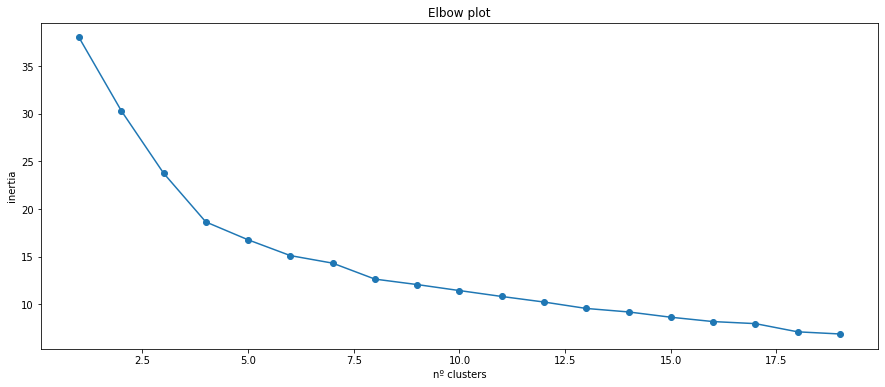

In [7]:
from numpy import *
where_are_NaNs = isnan(df)
df[where_are_NaNs]=0

inercia = []
for i in range(1,20): # Utilizamos un rango de 20 grupos para hacer un bucle de modelos y sacar, de ellos, la inercia, que llevamos a una lista vacía
  modelo = KMeans(n_clusters=i, init = 'k-means++', 
                  max_iter = 300, n_init = 10)
  modelo.fit(df)
  inercia.append(modelo.inertia_) #Añadimos la inercia a la lista, para después poder representarla

plt.figure(figsize=[15,6])
plt.title('Elbow plot')
plt.xlabel('nº clusters')
plt.ylabel('inertia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()

In [8]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1,10)] #hacemos una iteración con un rango de 10 grupos para el modelo de KMeans
silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k[1:]] #Sacamos la puntación de Silhouette y la guardamos en una lista, como vemos abajo
silhouette_scores

[0.20432291970251076,
 0.24863155211518723,
 0.2839292525481983,
 0.2509320976414728,
 0.23607776369052175,
 0.21886774173257417,
 0.2075754737804288,
 0.22089047049212832]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


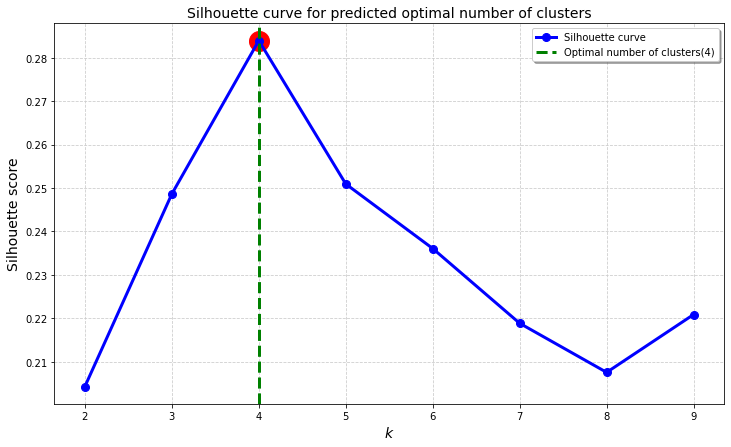

In [9]:
plt.figure(figsize=(12,7))
plt.plot(range(2,10), silhouette_scores, 'bo-', color='blue', linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.title('Silhouette curve for predicted optimal number of clusters', family='Arial', fontsize=14)

k = np.argmax(silhouette_scores) + 2 #para obtener los índices de mayor valor entre todos los ejes de puntuaciones de Silhouette. Le sumo dos para normalizar los datos. 

plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show() 

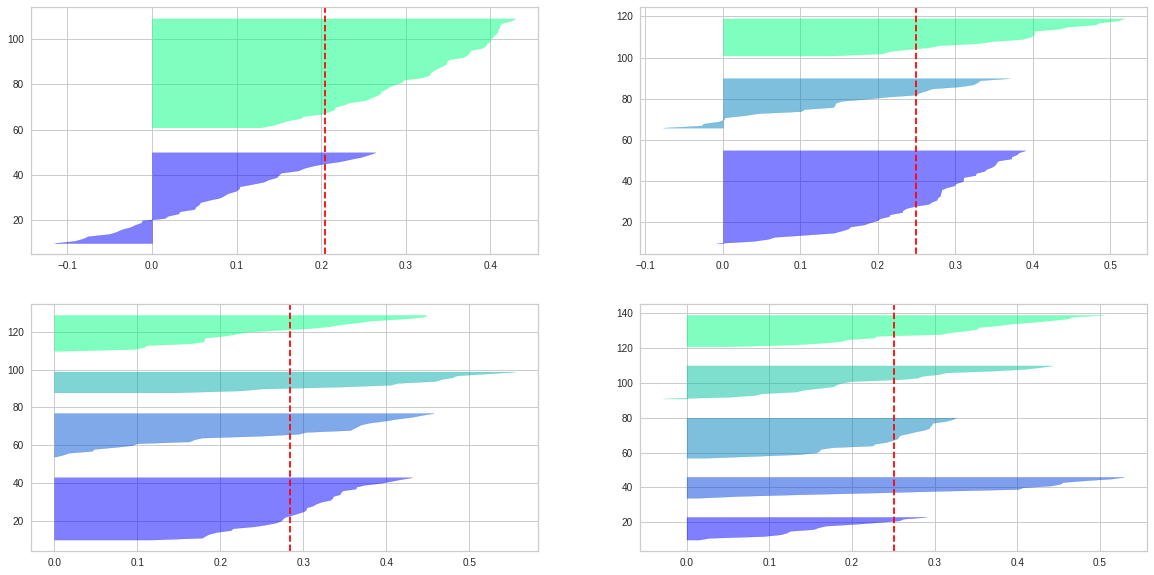

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax = plt.subplots(2, 2, figsize=(20,10))
for i in [2,3,4,5]:
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
  q, mod = divmod(i, 2)
  visualizer = SilhouetteVisualizer(km, colors='winter', ax=ax[q-1][mod])
  visualizer.fit(df) 

In [11]:
# 1. Paerson correlation coefficient
corr_mat = df.corr(method='pearson')
# 2. Correlation-based distance
dist = np.sqrt(0.5*(1-corr_mat))

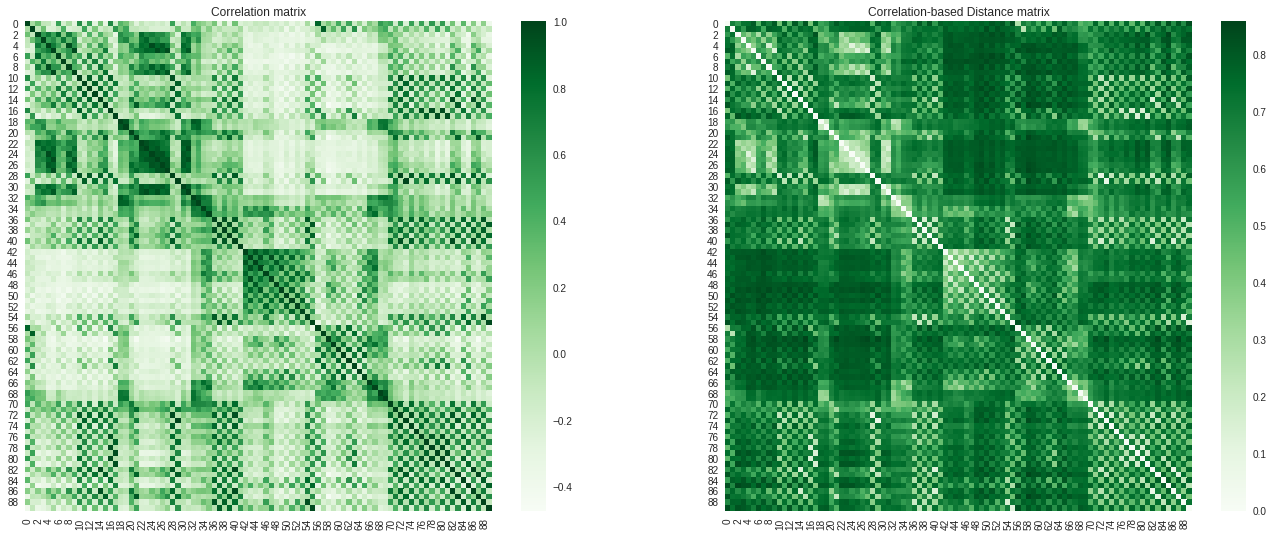

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))

sns.heatmap(corr_mat,ax= ax1, cmap='Greens');
sns.heatmap(dist,    ax= ax2, cmap='Greens');
ax1.title.set_text('Correlation matrix')
ax2.title.set_text('Correlation-based Distance matrix')
plt.show()

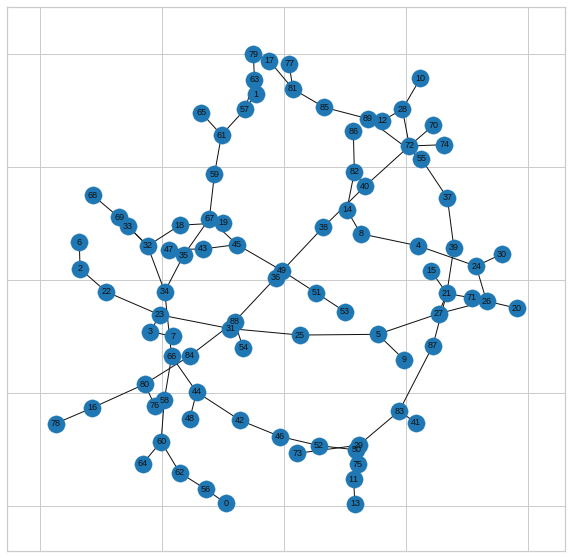

In [15]:
# Complete graph from distance matrix
S = dist.to_numpy()
from numpy import *
where_are_NaNs = isnan(S)
S[where_are_NaNs]=0

G = nx.from_numpy_matrix(S)

labels = dist.columns.values
#labels = [s.replace('ft_','') for s in labels]
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))

#Minimum spanning tree
T=nx.minimum_spanning_tree(G)

fig = plt.figure(figsize=(10,10))
nx.draw_networkx(T,
                 with_labels=True, 
                 font_size=9, 
                 cmap=plt.cm.coolwarm)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


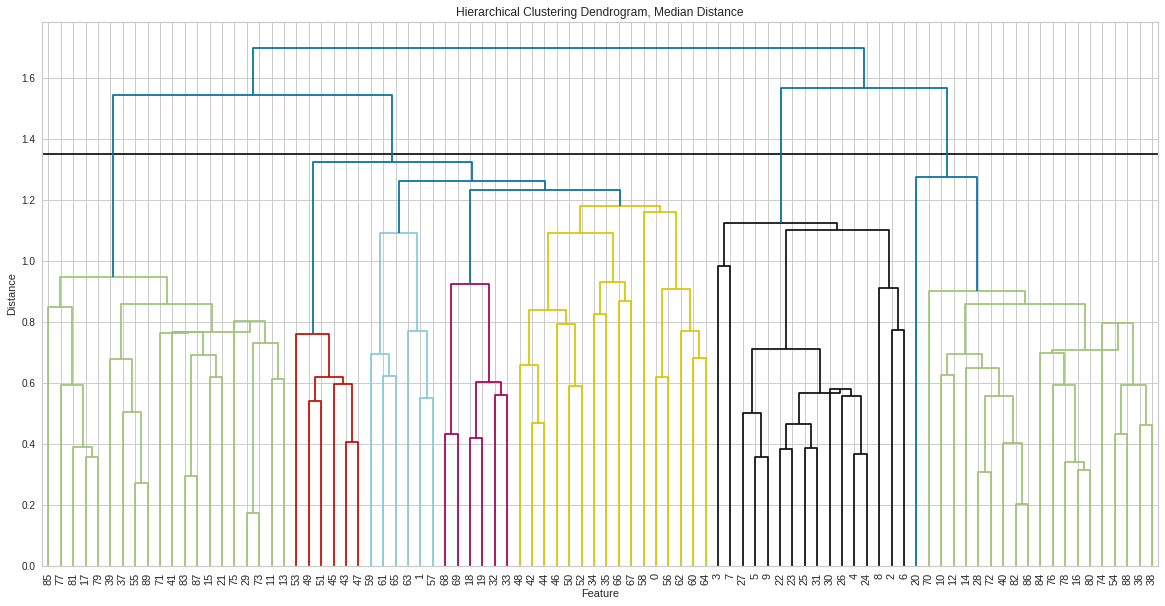

In [18]:
# Linkage matrix
link=sch.linkage(dist,'median')

# Plot dendrogram

fig = plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram, Median Distance')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.hlines(1.35,0,2000)
dn = sch.dendrogram(link,leaf_rotation=90.,leaf_font_size=11.)
plt.show()

In [19]:
# fcluster forms flat clusters from the hierarchical clustering defined by the given linkage matrix.

max_d = 1.35
clusters = fcluster(link,t=max_d, criterion='distance')

df_clust = pd.DataFrame({'Cluster':clusters, 'Features':df.columns.values.astype('str')})
df_clust.groupby('Cluster').count()

,Features
Cluster,
1,20
2,34
3,16
4,20


In [20]:
# Save the cluster-feature in a dictionary 
clust_feat = {}
for k in np.unique(clusters):
    clust_feat[k] = df_clust[df_clust.Cluster == k].Features.values

for k in np.unique(clusters):
    print('Cluster_{}'.format(k,2),'->', df_clust[df_clust.Cluster == k].Features.values)

Cluster_1 -> ['11' '13' '15' '17' '21' '29' '37' '39' '41' '55' '71' '73' '75' '77'
 '79' '81' '83' '85' '87' '89']
Cluster_2 -> ['0' '1' '18' '19' '32' '33' '34' '35' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '56' '57' '58' '59' '60' '61' '62' '63' '64'
 '65' '66' '67' '68' '69']
Cluster_3 -> ['2' '3' '4' '5' '6' '7' '8' '9' '22' '23' '24' '25' '26' '27' '30' '31']
Cluster_4 -> ['10' '12' '14' '16' '20' '28' '36' '38' '40' '54' '70' '72' '74' '76'
 '78' '80' '82' '84' '86' '88']


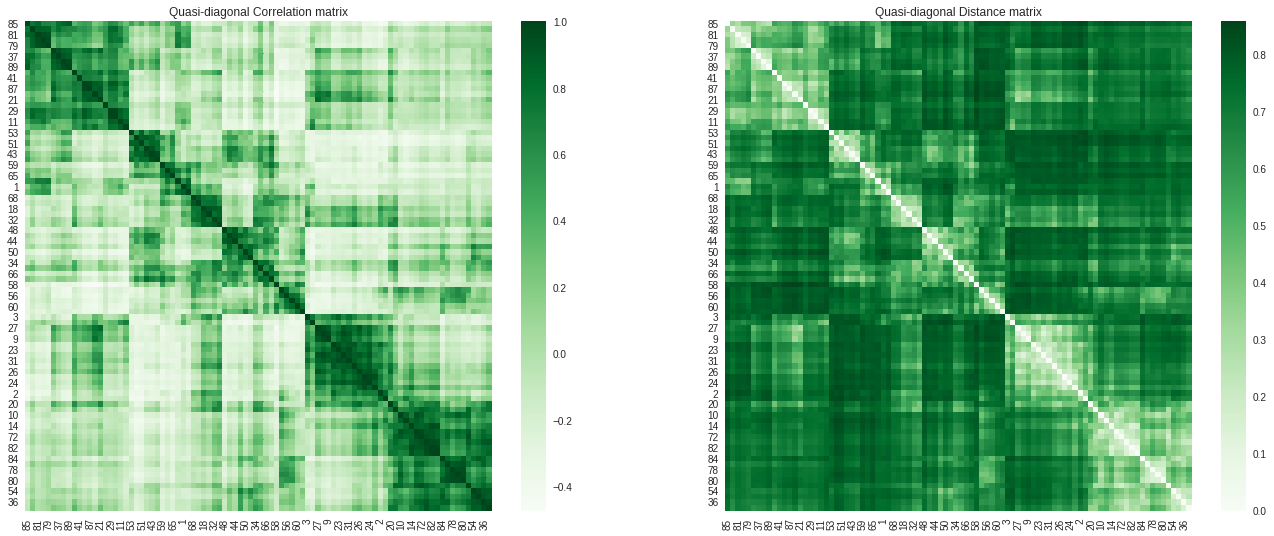

In [21]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link=link.astype(int)
    sortIx=pd.Series([link[-1,0],link[-1,1]])
    numItems=link[-1,3] # number of original items
    while sortIx.max()>=numItems:
        sortIx.index=range(0,sortIx.shape[0]*2,2) # make space
        df0=sortIx[sortIx>=numItems] # find clusters
        i=df0.index;j=df0.values-numItems
        sortIx[i]=link[j,0] # item 1
        df0=pd.Series(link[j,1],index=i+1)
        sortIx=sortIx.append(df0) # item 2
        sortIx=sortIx.sort_index() # re-sort
        sortIx.index=range(sortIx.shape[0]) # re-index
    return sortIx.tolist()

sortIx=getQuasiDiag(link)
sortIx=corr_mat.index[sortIx].tolist() # recover labels
corr_diag=corr_mat.loc[sortIx,sortIx] # reorder

sortIx=getQuasiDiag(link)
sortIx=dist.index[sortIx].tolist() # recover labels
dist_diag=dist.loc[sortIx,sortIx] # reorder

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))

sns.heatmap(corr_diag,ax= ax1, cmap='Greens');
sns.heatmap(dist_diag,ax= ax2, cmap='Greens');
ax1.title.set_text('Quasi-diagonal Correlation matrix')
ax2.title.set_text('Quasi-diagonal Distance matrix')
plt.show()

In [22]:
def numBins(nObs,corr=None):
    # Optimal number of bins for discretization
    if corr is None: # univariate case
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.)
        b=round(z/6.+2./(3*z)+1./3)
    else: # bivariate case
        if np.isnan(corr):
          corr = np.nan_to_num(corr)
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5)
    return int(b)

def varInfo(x,y,norm=False):
    if (x == y).all():
        return 0
    # variation of information
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0]
    iXY=mutual_info_score(None,None,contingency=cXY)
    hX=ss.entropy(np.histogram(x,bXY)[0]) # marginal
    hY=ss.entropy(np.histogram(y,bXY)[0]) # marginal
    vXY=hX+hY-2*iXY # variation of information
    if norm:
        hXY=hX+hY-iXY # joint
        vXY/=hXY # normalized variation of information
    return vXY

In [23]:
# Drop NaNs and calculate variation of information
ft_red = df.dropna()
V = np.zeros(corr_diag.shape)

for i in range(corr_mat.shape[0]):
    for j in range(i):
        x = ft_red.iloc[:,i]
        y = ft_red.iloc[:,j]
        V[i,j] = varInfo(x,y,norm=True)
       
dist_info = pd.DataFrame(V + V.T,columns=df.columns,index=df.columns)
dist_info

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.980484,0.914597,0.958274,0.965807,0.953829,0.902699,0.962926,0.960957,0.939712,...,0.868988,0.947346,0.922329,0.934186,0.909790,0.936710,0.946618,0.948526,0.920334,0.938985
1,0.980484,0.000000,0.975721,0.946674,0.974923,0.966030,0.968218,0.926980,0.969580,0.968752,...,0.967471,0.915230,0.956983,0.971299,0.948706,0.949782,0.959827,0.976271,0.956436,0.953067
2,0.914597,0.975721,0.000000,0.842318,0.729697,0.906708,0.689500,0.949932,0.835735,0.921276,...,0.948246,0.937242,0.928206,0.974476,0.938783,0.912418,0.929469,0.974529,0.937637,0.953873
3,0.958274,0.946674,0.842318,0.000000,0.901159,0.841212,0.894336,0.792325,0.929060,0.820265,...,0.943489,0.964773,0.942347,0.955377,0.944269,0.944456,0.949641,0.962516,0.958217,0.962861
4,0.965807,0.974923,0.729697,0.901159,0.000000,0.825346,0.820972,0.935111,0.511028,0.855933,...,0.953338,0.961515,0.896195,0.916604,0.956337,0.945341,0.866854,0.922249,0.967041,0.969274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.936710,0.949782,0.912418,0.944456,0.945341,0.945892,0.938538,0.970810,0.936693,0.954751,...,0.939816,0.695426,0.946668,0.872161,0.950716,0.000000,0.945782,0.890168,0.961308,0.695368
86,0.946618,0.959827,0.929469,0.949641,0.866854,0.958300,0.912801,0.956246,0.833860,0.935370,...,0.856526,0.951260,0.379689,0.970163,0.853149,0.945782,0.000000,0.935142,0.741565,0.966058
87,0.948526,0.976271,0.974529,0.962516,0.922249,0.817527,0.932946,0.935580,0.925516,0.813865,...,0.966540,0.876088,0.958447,0.410735,0.957040,0.890168,0.935142,0.000000,0.950244,0.821863
88,0.920334,0.956436,0.937637,0.958217,0.967041,0.962368,0.959662,0.936098,0.955535,0.950756,...,0.760975,0.956152,0.787752,0.954329,0.625991,0.961308,0.741565,0.950244,0.000000,0.961699


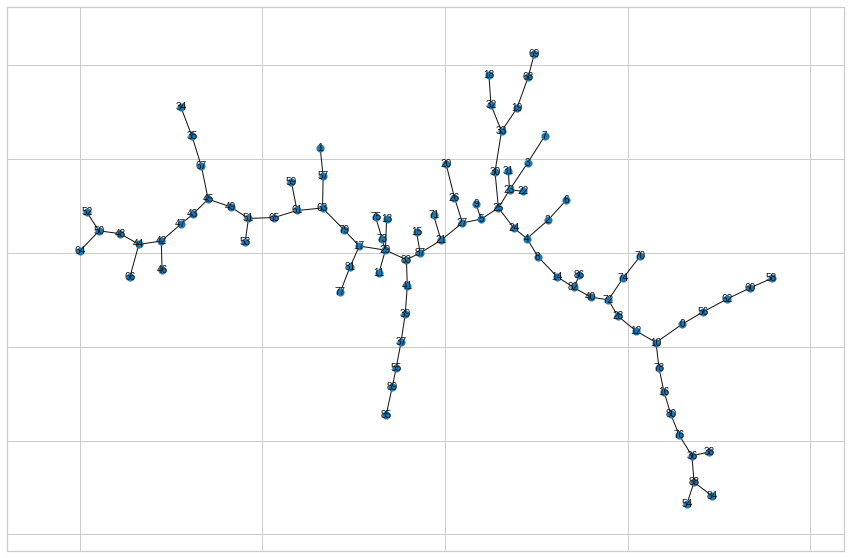

In [25]:
# Fully connected graph
X = dist_info.to_numpy()
G = nx.from_numpy_matrix(X)

# Minumum spanning tree
labels = dist.columns.values
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))
T=nx.minimum_spanning_tree(G)

# MST Plot
fig = plt.figure(figsize=(15, 10))
nx.draw_networkx(T, with_labels=True, font_size=10, node_size=60,pos=nx.kamada_kawai_layout(T))
plt.show()

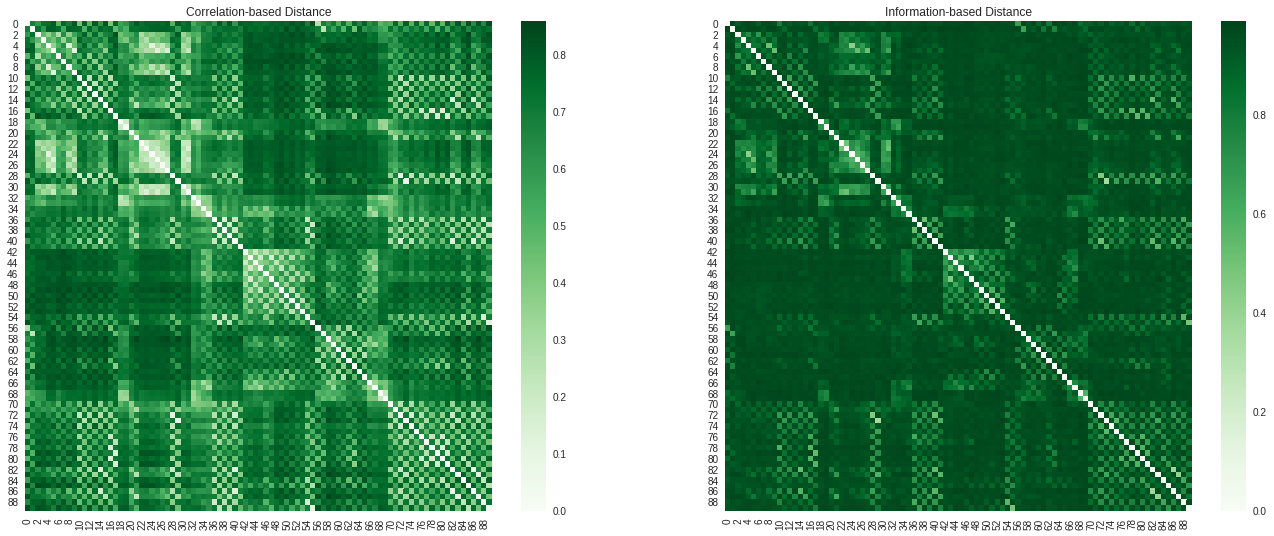

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))

sns.heatmap(dist,     ax= ax1, cmap='Greens');
sns.heatmap(dist_info,ax= ax2, cmap='Greens');
ax1.title.set_text('Correlation-based Distance')
ax2.title.set_text('Information-based Distance')
plt.show()

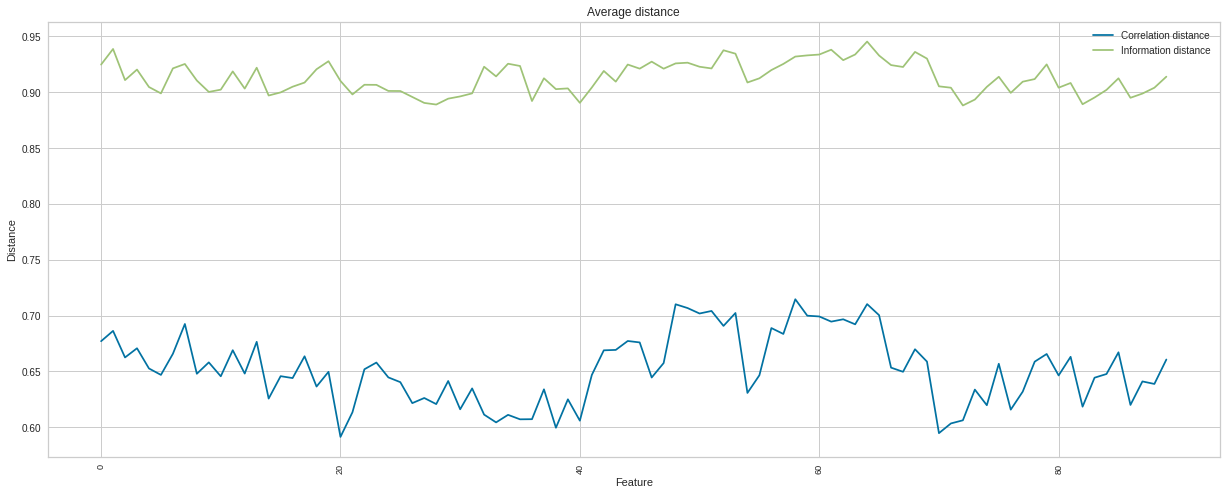

In [27]:
plt.figure(figsize=(21,8))

plt.plot(dist.mean())
plt.plot(dist_info.mean())
plt.title('Average distance')
plt.legend(('Correlation distance','Information distance'))
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90,fontsize=9)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


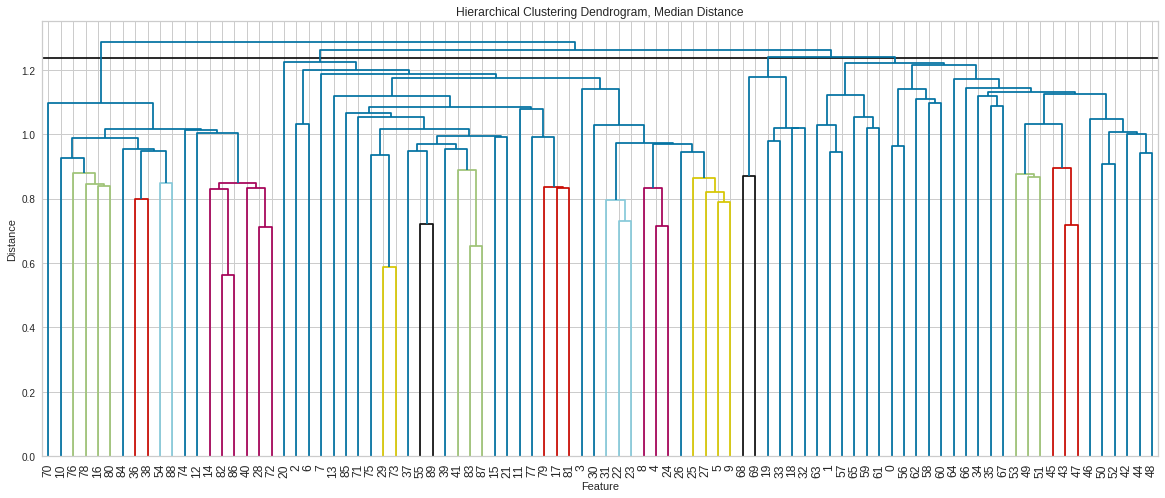

In [35]:
link_info=sch.linkage(dist_info,'single')
fig = plt.figure(figsize=(20, 8))
plt.title('Hierarchical Clustering Dendrogram, Median Distance')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.hlines(1.238,0,2000)
dn = sch.dendrogram(link_info, leaf_rotation=90.,leaf_font_size=12.)
plt.show()

In [34]:
# fcluster forms flat clusters from the hierarchical clustering defined by the given linkage matrix.

max_d = 1.238
clusters = fcluster(link_info,t=max_d, criterion='distance')

df_clust = pd.DataFrame({'Cluster':clusters, 'Features':df.columns.values.astype('str')})
df_clust.groupby('Cluster').count()

,Features
Cluster,
1,19
2,37
3,6
4,28


In [36]:
for k in np.unique(clusters):
    print('Cluster_{}'.format(k,2),'->', df_clust[df_clust.Cluster == k].Features.values)

Cluster_1 -> ['10' '12' '14' '16' '28' '36' '38' '40' '54' '70' '72' '74' '76' '78'
 '80' '82' '84' '86' '88']
Cluster_2 -> ['2' '3' '4' '5' '6' '7' '8' '9' '11' '13' '15' '17' '20' '21' '22' '23'
 '24' '25' '26' '27' '29' '30' '31' '37' '39' '41' '55' '71' '73' '75'
 '77' '79' '81' '83' '85' '87' '89']
Cluster_3 -> ['18' '19' '32' '33' '68' '69']
Cluster_4 -> ['0' '1' '34' '35' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52'
 '53' '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67']


In [37]:
sortIx=getQuasiDiag(link_info)
sortIx=dist_info.index[sortIx].tolist() # recover labels
dist_info_diag=dist_info.loc[sortIx,sortIx] # reorder

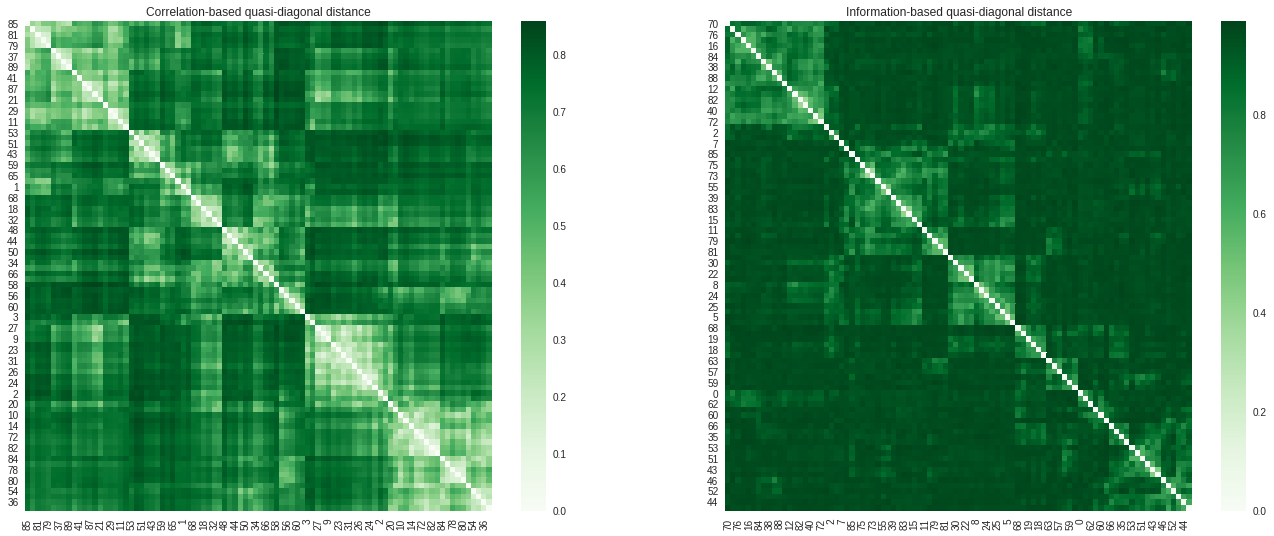

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23, 9))

sns.heatmap(dist_diag,     ax= ax1, cmap='Greens');
sns.heatmap(dist_info_diag,ax= ax2, cmap='Greens');
ax1.title.set_text('Correlation-based quasi-diagonal distance')
ax2.title.set_text('Information-based quasi-diagonal distance')
plt.show()